In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
pip install fix_yahoo_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import datetime
import warnings
import yfinance as yfin
yfin.pdr_override()

In [ ]:
# warnings.filterwarnings("ignore")

In [11]:
tickers = ["AAPL","GOOGL"]
start = "2020-01-01"
end = "2022-01-01"
df_stocks = pdr.get_data_yahoo(tickers,start = start, end=end)
print(df_stocks.shape)

[*********************100%***********************]  2 of 2 completed
(505, 12)


In [12]:
df_stocks_adj_close = df_stocks['Adj Close']
df_stocks_adj_close.head()

,AAPL,GOOGL
Date,,
2020-01-02,73.449387,68.433998
2020-01-03,72.735321,68.075996
2020-01-06,73.314896,69.890503
2020-01-07,72.970093,69.755501
2020-01-08,74.143913,70.251999


In [13]:
def get_data(stocks, start, end):
  # stockData = pdr.get_data_yahoo(stocks, start, end)
  # stockData = stockData['Close']
  df_stocks = pdr.get_data_yahoo(tickers,start = start, end=end)
  df_stocks_adj_close = df_stocks['Adj Close']
  returns = df_stocks_adj_close.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix
# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(tickers, start, end)
# print(len(meanReturns))
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[*********************100%***********************]  2 of 2 completed
[0.07941792 0.92058208]


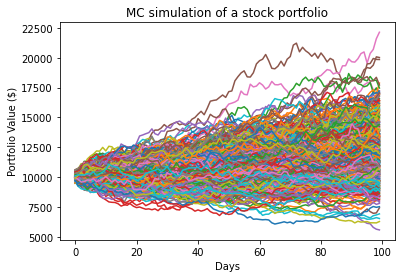

In [14]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()